# Architecture experiment: Subjective and physiological responses to interiors


### Libraries

- [scikit-learn](http://scikit-learn.org/stable/)
- pandas
- matplotlib
- seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import seaborn as sns
%matplotlib inline

In [4]:
DATA_FOLDER = './data/' #The data is in the .gitignore in order to not upload it to the GitHub repository

Execute the following line to export from the jupyter notebook(.ipynb) to a .py file (ignore the warnings):

In [5]:
#!jupyter nbconvert --to script Project2-Notebook.ipynb 

## Exploratory Data Analysis

### Loading phase

First we load the data into a Pandas data frame (with the Pandas library; to install this package with conda run:
`conda install -c anaconda pandas`):

In [6]:
df_interior_features = pd.read_csv(DATA_FOLDER + 'T_features.csv')
df_labels_and_features = pd.read_csv(DATA_FOLDER + 'table_dataset_GreeceSwitzerland_N265_metrics_mSC5_JPEGtoBMP_Michelson_RMS.csv')

Let's see what is inside `table_dataset_GreeceSwitzerland_N265_metrics_mSC5_JPEGtoBMP_Michelson_RMS.csv`:

In [7]:
df_labels_and_features.head(7)

,ID,Country,Stimulus_SkyType,Stimulus_Context,Gender,Pattern,pleasant,interesting,exciting,calming,complex,bright,view,spacious,contrast_mean_mSC5,contrast_mean_Michelson,contrast_mean_RMS,complexity_mean_JPEGtoBMP
0,1,Greece,clear low,social,Male,P1EL,8,7,6,9,4,6,4,8,11.188207,0.907864,106.363985,0.104734
1,1,Greece,clear low,social,Male,P2EL,8,5,6,8,4,7,3,8,11.941067,0.904661,106.590842,0.122357
2,1,Greece,clear low,social,Male,P3EL,9,8,8,9,6,7,2,8,12.509719,0.905066,106.604335,0.119979
3,1,Greece,clear low,social,Male,P4EL,7,7,7,7,6,6,1,8,12.846015,0.906583,106.929875,0.115287
4,1,Greece,clear low,social,Male,P5EL,8,10,9,7,8,7,5,8,12.211881,0.907546,105.478575,0.118572
5,1,Greece,clear low,social,Male,P6EL,8,8,8,7,9,7,3,8,12.288385,0.912304,106.582042,0.113396
6,2,Greece,clear low,social,Male,P1EL,6,7,8,6,0,7,6,7,11.188207,0.907864,106.363985,0.104734


In [8]:
df_labels_and_features.shape

(1590, 18)

In [9]:
df_labels_and_features.columns

Index(['ID', 'Country', 'Stimulus_SkyType', 'Stimulus_Context', 'Gender',
       'Pattern', 'pleasant', 'interesting', 'exciting', 'calming', 'complex',
       'bright', 'view', 'spacious', 'contrast_mean_mSC5',
       'contrast_mean_Michelson', 'contrast_mean_RMS',
       'complexity_mean_JPEGtoBMP'],
      dtype='object')

The data frame has 1590 rows × 18 columns where we can see the original sample of the experiment (both inputs and outputs (xn,yn)). Each column is explained below:
* 'ID': Identifier of the subject of the experiment (of one person).
* 'Country': Country where the person was living.  2 x countries (Greece –138 participants, Switzerland –127 participants)
* 'Stimulus_SkyType': 3 x sky types (clear sky with high sun angle, clear sky with low sun angle, overcast sky)
* 'Stimulus_Context':  2 x context scenarios (social scenario, work scenario)
* 'Gender': Male or Female
* 'Pattern': 6 x patterns (determine how are the blinds, and so how are the shadows)
* Outputs (yn): 'pleasant', 'interesting', 'exciting', 'calming', 'complex', 'bright', 'view', 'spacious'.
* interior metrics (for describing the interior (the kind of room, light, ...) quantitatively): 'contrast_mean_mSC5', 'contrast_mean_Michelson', 'contrast_mean_RMS', 'complexity_mean_JPEGtoBMP'.

Note: The metrics in this data set are applied to the whole virtual reallity image (in every interior).

Now let's see what is inside `T_features.csv`:

In [10]:
df_interior_features.head()

,filename,Pattern,Context,SkyType,mean_pleasant,median_pleasant,mean_interesting,median_interesting,mean_calming,median_calming,...,contrast_max_mSC5,contrast_mean_Michelson,contrast_mean_Michelson_cube123,contrast_mean_Michelson_cube3,contrast_mean_RMS,contrast_mean_RMS_cube123,contrast_mean_RMS_cube3,complexity_mean_JPEGtoBMP,complexity_cube3_JPEGtoBMP,complexity_cube123_JPEGtoBMP
0,p1_social_clearhigh_sg_largewin_simu,P1EL,social,clearhigh,5.439024,6,4.512195,4,5.731707,6.0,...,82,0.881714,0.822095,0.696552,104.887032,116.926766,138.288359,0.101518,0.158865,0.129797
1,p1_social_clearlow_sg_largewin_simu,P1EL,social,clearlow,5.571429,6,4.510204,5,5.897959,6.0,...,85,0.907864,0.846031,0.750000,106.363985,108.835770,119.479999,0.104734,0.136334,0.127709
2,p1_social_overcast_sg_largewin_simu,P1EL,social,overcast,6.093023,6,4.790698,5,6.651163,7.0,...,49,0.886125,0.829098,0.713287,102.615246,113.078576,133.037937,0.093733,0.134794,0.113091
3,p1_work_clearhigh_sg_largewin_simu,P1EL,work,clearhigh,5.804348,6,5.086957,5,6.152174,6.5,...,116,0.924177,0.874757,0.680272,107.051167,119.883534,142.784796,0.099205,0.159858,0.124465
4,p1_work_clearlow_sg_largewin_simu,P1EL,work,clearlow,5.255814,5,4.418605,5,5.837209,6.0,...,116,0.937813,0.887639,0.728223,108.174380,112.987399,126.132718,0.102264,0.139392,0.122615


In [11]:
df_interior_features.shape

(36, 31)

In [12]:
df_interior_features.columns

Index(['filename', 'Pattern', 'Context', 'SkyType', 'mean_pleasant',
       'median_pleasant', 'mean_interesting', 'median_interesting',
       'mean_calming', 'median_calming', 'mean_exciting', 'median_exciting',
       'mean_complex', 'median_complex', 'mean_bright', 'median_bright',
       'mean_view', 'median_view', 'mean_spacious', 'median_spacious',
       'contrast_mean_mSC5', 'contrast_max_mSC5', 'contrast_mean_Michelson',
       'contrast_mean_Michelson_cube123', 'contrast_mean_Michelson_cube3',
       'contrast_mean_RMS', 'contrast_mean_RMS_cube123',
       'contrast_mean_RMS_cube3', 'complexity_mean_JPEGtoBMP',
       'complexity_cube3_JPEGtoBMP', 'complexity_cube123_JPEGtoBMP'],
      dtype='object')

We have obtained a data frame with 36 rows × 31 columns. This time we see the features of each kind of interior (the kind of room, light, ...)  and several metrics for describing quantitatively the interior situation Each column is explained below:
* 'filename': File where we have the cube map projections associated to every interior. (See in `./Cubemap_Projections/BMP/<filename>` or `./Cubemap_Projections/JPEG/<filename>`). The filenames have the structure "p(pattern_id)_(context)_(SkyType)_sg_largewin_simu".
* 'Pattern': 6 x patterns (determine how are the blinds, and so how are the shadows)
* 'Context': 2 x context scenarios (social scenario, work scenario)
* 'SkyType': 3 x sky types (clear sky with high sun angle, clear sky with low sun angle, overcast sky)
* Means and medians of the outputs (of what people have answer in their respective survey): 'mean_pleasant', 'median_pleasant', 'mean_interesting', 'median_interesting', 'mean_calming', 'median_calming', mean_exciting', 'median_exciting', 'mean_complex', 'median_complex', 'mean_bright', 'median_bright', 'mean_view', 'median_view', 'mean_spacious', 'median_spacious',
* Interior metrics (for describing the interior quantitatively): 'contrast_mean_mSC5', 'contrast_max_mSC5', 'contrast_mean_Michelson', 'contrast_mean_Michelson_cube123', 'contrast_mean_Michelson_cube3', 'contrast_mean_RMS', 'contrast_mean_RMS_cube123','contrast_mean_RMS_cube3', 'complexity_mean_JPEGtoBMP', 'complexity_cube3_JPEGtoBMP', 'complexity_cube123_JPEGtoBMP'

Note: The metrics in this data set are applied not just to the whole virtual reallity image (we have already this data in the other data frame), but to the different parts of the whole image. Cube1 refers to what you see on your left (when you are doing the experiment with VR), cube2 refers to the front and cube3 refers to the right. Cube123 refers to the metric applied to the three subimages. For more details see`./Cubemap_Projections/JPEG/<filename>`.

Having done this previous load and brief analysis, we are going to create the data frame we are interested in work with. Firstly we find that our inputs (or features) could be classified in two types and we are taking both of them: 
* 1- Features of the people (country and gender) who have taken part in the experiment.
* 2- Features of the interior: Now we are taking both categorical and metrics data.

Secondly, the labels (outputs) of our new data frame are the data that comes from every survey (which has been done by each person): 'pleasant', 'interesting', 'exciting', 'calming', 'complex', 'bright', 'view', 'spacious'. We are asked to study first the 'exciting' and the 'calming' labels but we will split the data frame afterwards.

In [13]:
df_labels_and_features.head(1)

,ID,Country,Stimulus_SkyType,Stimulus_Context,Gender,Pattern,pleasant,interesting,exciting,calming,complex,bright,view,spacious,contrast_mean_mSC5,contrast_mean_Michelson,contrast_mean_RMS,complexity_mean_JPEGtoBMP
0,1,Greece,clear low,social,Male,P1EL,8,7,6,9,4,6,4,8,11.188207,0.907864,106.363985,0.104734


In [14]:
df_interior_features.head(1)

,filename,Pattern,Context,SkyType,mean_pleasant,median_pleasant,mean_interesting,median_interesting,mean_calming,median_calming,...,contrast_max_mSC5,contrast_mean_Michelson,contrast_mean_Michelson_cube123,contrast_mean_Michelson_cube3,contrast_mean_RMS,contrast_mean_RMS_cube123,contrast_mean_RMS_cube3,complexity_mean_JPEGtoBMP,complexity_cube3_JPEGtoBMP,complexity_cube123_JPEGtoBMP
0,p1_social_clearhigh_sg_largewin_simu,P1EL,social,clearhigh,5.439024,6,4.512195,4,5.731707,6.0,...,82,0.881714,0.822095,0.696552,104.887032,116.926766,138.288359,0.101518,0.158865,0.129797


For doing the join, we check that one of the metrics determine totally the interior (there are not two interiors with the same metric value):

In [15]:
df_interior_features["to_join"]=(1000*df_interior_features["contrast_mean_RMS"]).astype(int) #We cannot do the join on the float
df_labels_and_features["to_join"]=(1000*df_labels_and_features["contrast_mean_RMS"]).astype(int) #so we add another column

df_interior_features.set_index("to_join").index.is_unique

True

In [16]:
df_ml = df_interior_features.merge(df_labels_and_features, on = "to_join", how = 'inner', suffixes = ("_a",""))
df_ml.head(1)

,filename,Pattern_a,Context,SkyType,mean_pleasant,median_pleasant,mean_interesting,median_interesting,mean_calming,median_calming,...,exciting,calming,complex,bright,view,spacious,contrast_mean_mSC5,contrast_mean_Michelson,contrast_mean_RMS,complexity_mean_JPEGtoBMP
0,p1_social_clearhigh_sg_largewin_simu,P1EL,social,clearhigh,5.439024,6,4.512195,4,5.731707,6.0,...,5,7,0,7,6,9,5.023496,0.881714,104.887032,0.101518


Now we drop the duplicates columns and order the columns in order to have a data frame with the structure X|Y, where X is the matrix of features (each column is a feature) and Y is the matrix with the labels.

In [17]:
df_ml = df_ml[['Country', 'Gender', 'Pattern', 'Context', 'SkyType', 'contrast_mean_mSC5', 'contrast_max_mSC5', 
               'contrast_mean_Michelson', 'contrast_mean_Michelson_cube123', 'contrast_mean_Michelson_cube3', 
               'contrast_mean_RMS', 'contrast_mean_RMS_cube123', 'contrast_mean_RMS_cube3', 'complexity_mean_JPEGtoBMP',
               'complexity_cube3_JPEGtoBMP', 'complexity_cube123_JPEGtoBMP', 'pleasant', 'interesting', 'exciting', 'calming', 
               'complex', 'bright', 'view', 'spacious']]

In [18]:
df_ml.head(2)

,Country,Gender,Pattern,Context,SkyType,contrast_mean_mSC5,contrast_max_mSC5,contrast_mean_Michelson,contrast_mean_Michelson_cube123,contrast_mean_Michelson_cube3,...,complexity_cube3_JPEGtoBMP,complexity_cube123_JPEGtoBMP,pleasant,interesting,exciting,calming,complex,bright,view,spacious
0,Greece,Male,P1EL,social,clearhigh,5.023496,82,0.881714,0.822095,0.696552,...,0.158865,0.129797,7,5,5,7,0,7,6,9
1,Greece,Male,P1EL,social,clearhigh,5.023496,82,0.881714,0.822095,0.696552,...,0.158865,0.129797,5,4,4,7,3,8,5,10


We can aslso check and see that there are no missing values. (all instances are non-null)

In [35]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1590 entries, 0 to 1589
Data columns (total 24 columns):
Country                            1590 non-null object
Gender                             1590 non-null object
Pattern                            1590 non-null object
Context                            1590 non-null object
SkyType                            1590 non-null object
contrast_mean_mSC5                 1590 non-null float64
contrast_max_mSC5                  1590 non-null int64
contrast_mean_Michelson            1590 non-null float64
contrast_mean_Michelson_cube123    1590 non-null float64
contrast_mean_Michelson_cube3      1590 non-null float64
contrast_mean_RMS                  1590 non-null float64
contrast_mean_RMS_cube123          1590 non-null float64
contrast_mean_RMS_cube3            1590 non-null float64
complexity_mean_JPEGtoBMP          1590 non-null float64
complexity_cube3_JPEGtoBMP         1590 non-null float64
complexity_cube123_JPEGtoBMP       1590 non-n

we can also see that all ratings are between 0 and 10

In [52]:
df_ml[['pleasant', 'interesting', 'exciting', 'calming', 'complex', 'bright',
       'view', 'spacious']].describe().loc[['min','max']]


,pleasant,interesting,exciting,calming,complex,bright,view,spacious
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


Finally, from this data frame is easy to get X and the labels desired (y) separately. So we get the data frame which contains the matrix of features X and, separately,the labels corresponding to 'exciting' and 'calming' (we were asked to analize this labels firstly):

In [19]:
x_fdata = df_ml.iloc[:,0:16] #fdata -> first data without preprocessing
x_fdata.head(1)

,Country,Gender,Pattern,Context,SkyType,contrast_mean_mSC5,contrast_max_mSC5,contrast_mean_Michelson,contrast_mean_Michelson_cube123,contrast_mean_Michelson_cube3,contrast_mean_RMS,contrast_mean_RMS_cube123,contrast_mean_RMS_cube3,complexity_mean_JPEGtoBMP,complexity_cube3_JPEGtoBMP,complexity_cube123_JPEGtoBMP
0,Greece,Male,P1EL,social,clearhigh,5.023496,82,0.881714,0.822095,0.696552,104.887032,116.926766,138.288359,0.101518,0.158865,0.129797


In [20]:
y_data = df_ml["exciting"]
y_data.to_frame().head() #Note that y_data is a Pandas serie

,exciting
0,5
1,4
2,4
3,5
4,5


### Preprocesing Phase

From the dataframe we can see that there are 5 catgorical features:
1. __*Country*__ 
2. __*Gender*__ 
3. __*Pattern*__ 
4. __*Context*__ 
5. __*SkyType*__ 

We can confirm this by checking the type of data for each feature:

In [21]:
x_fdata.dtypes

Country                             object
Gender                              object
Pattern                             object
Context                             object
SkyType                             object
contrast_mean_mSC5                 float64
contrast_max_mSC5                    int64
contrast_mean_Michelson            float64
contrast_mean_Michelson_cube123    float64
contrast_mean_Michelson_cube3      float64
contrast_mean_RMS                  float64
contrast_mean_RMS_cube123          float64
contrast_mean_RMS_cube3            float64
complexity_mean_JPEGtoBMP          float64
complexity_cube3_JPEGtoBMP         float64
complexity_cube123_JPEGtoBMP       float64
dtype: object

As we can see the five features mentionned above are the only categorical features (type object).

Let's inspect these features closely

In [22]:
categorical_features = ['Country','Gender','Pattern','Context', \
                        'SkyType']
for feat in categorical_features:
    print(feat + ':')
    print(x_fdata[feat].value_counts())

Country:
Greece         828
Switzerland    762
Name: Country, dtype: int64
Gender:
Male      816
Female    774
Name: Gender, dtype: int64
Pattern:
P4EL    265
P1EL    265
P3EL    265
P6EL    265
P2EL    265
P5EL    265
Name: Pattern, dtype: int64
Context:
social    798
work      792
Name: Context, dtype: int64
SkyType:
clearlow     552
clearhigh    522
overcast     516
Name: SkyType, dtype: int64


In order to perform dummy variable encoding on the categorical features, we can use the pandas method `pd.get_dummies()`. Also since we need k-1 dummy variables to represent k categories, we can drop the first column for each encoding (`drop_first = True`). We'll store this as a new dataframe `dummy_df`.

In [30]:
dummy_df = pd.get_dummies(x_fdata, columns=categorical_features, drop_first=False)
dummy_df.head(3)

,contrast_mean_mSC5,contrast_max_mSC5,contrast_mean_Michelson,contrast_mean_Michelson_cube123,contrast_mean_Michelson_cube3,contrast_mean_RMS,contrast_mean_RMS_cube123,contrast_mean_RMS_cube3,complexity_mean_JPEGtoBMP,complexity_cube3_JPEGtoBMP,...,Pattern_P2EL,Pattern_P3EL,Pattern_P4EL,Pattern_P5EL,Pattern_P6EL,Context_social,Context_work,SkyType_clearhigh,SkyType_clearlow,SkyType_overcast
0,5.023496,82,0.881714,0.822095,0.696552,104.887032,116.926766,138.288359,0.101518,0.158865,...,0,0,0,0,0,1,0,1,0,0
1,5.023496,82,0.881714,0.822095,0.696552,104.887032,116.926766,138.288359,0.101518,0.158865,...,0,0,0,0,0,1,0,1,0,0
2,5.023496,82,0.881714,0.822095,0.696552,104.887032,116.926766,138.288359,0.101518,0.158865,...,0,0,0,0,0,1,0,1,0,0


We standardize the features in preparation for the training (output excluded, "exciting" column).

In [24]:
for feat in dummy_df.columns.tolist():
    mean = dummy_df[feat].mean()
    std = dummy_df[feat].std()
    dummy_df[feat] = (dummy_df[feat] - mean)/std

In [25]:
x_data = dummy_df #x_data is the final standardized data

### Data visualization

In this section we try to visualize the possible relationship between the features and the respose variable

First let's plot the distribution of exciting

count    1590.000000
mean        5.059119
std         2.163320
min         0.000000
25%         4.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: exciting, dtype: float64


C:\Users\kiyarash\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


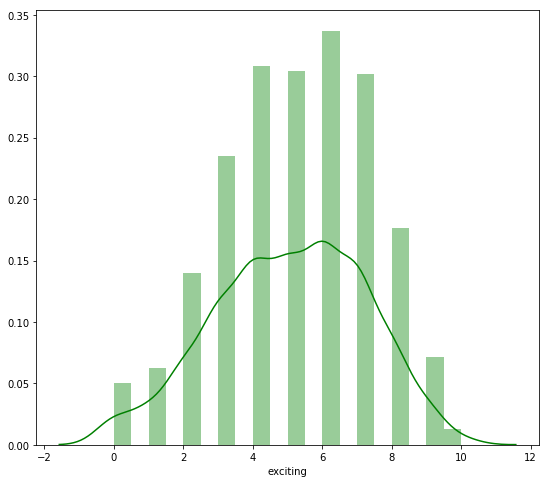

In [64]:
print(y_data.describe())
plt.figure(figsize=(9, 8))
sns.distplot(y_data, color='g');

It almost looks symetric

Now we check the correlation between the **numeric** features and 'exciting'

In [86]:
numeric_data = pd.concat([y_data, x_data], axis=1, sort=False).drop( [ 'Country_Greece', 'Country_Switzerland',
       'Gender_Female', 'Gender_Male', 'Pattern_P1EL', 'Pattern_P2EL',
       'Pattern_P3EL', 'Pattern_P4EL', 'Pattern_P5EL', 'Pattern_P6EL',
       'Context_social', 'Context_work', 'SkyType_clearhigh',
       'SkyType_clearlow', 'SkyType_overcast'], axis = 1)



numeric_data.corr()['exciting']

exciting                           1.000000
contrast_mean_mSC5                 0.097654
contrast_max_mSC5                  0.106577
contrast_mean_Michelson           -0.004917
contrast_mean_Michelson_cube123    0.000960
contrast_mean_Michelson_cube3      0.162255
contrast_mean_RMS                  0.008236
contrast_mean_RMS_cube123         -0.051177
contrast_mean_RMS_cube3           -0.063757
complexity_mean_JPEGtoBMP          0.091284
complexity_cube3_JPEGtoBMP         0.122468
complexity_cube123_JPEGtoBMP       0.118641
Name: exciting, dtype: float64

unfortunately there are no strongly correlated features (with respect to 'exciting').
But correlation only measures linear relationship. we might get more info by plotting the data.

#### plots

we visualize the relations of "exciting"(response variable) and the features

C:\Users\kiyarash\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\kiyarash\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\kiyarash\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\kiyarash\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\kiyarash\Anaconda3\lib\site-packages\matplotlib

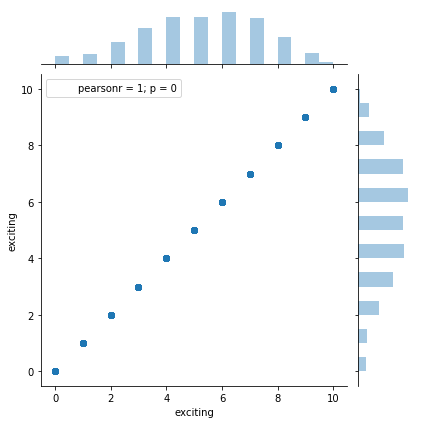

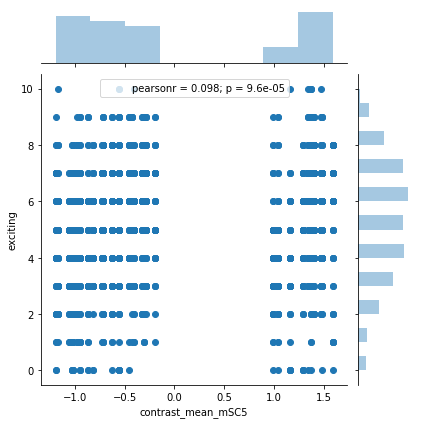

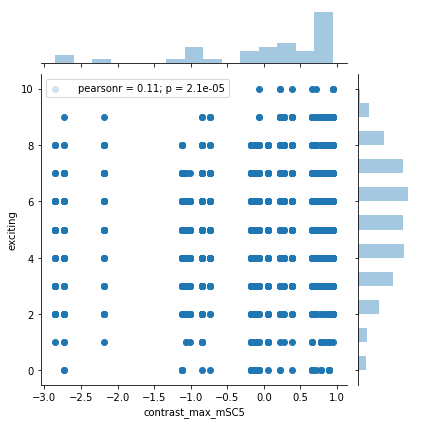

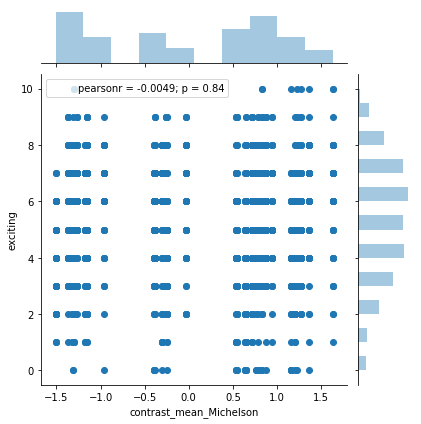

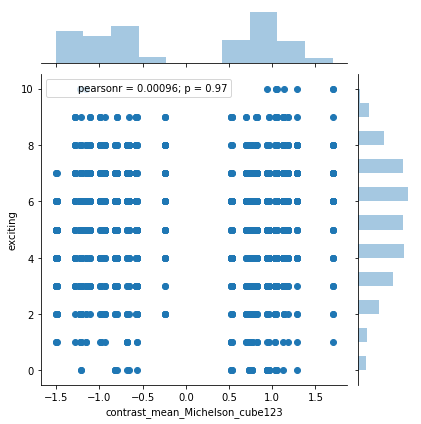

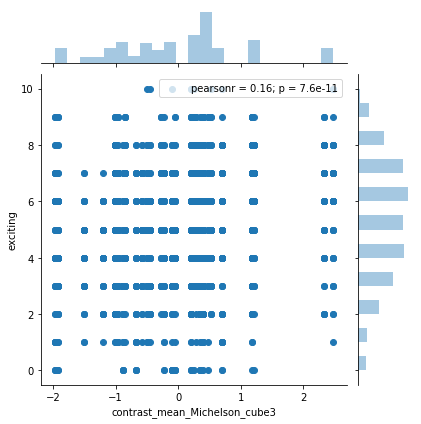

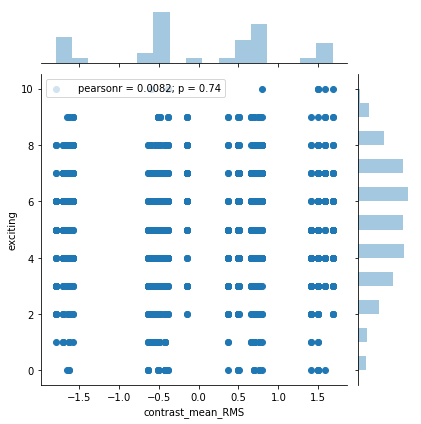

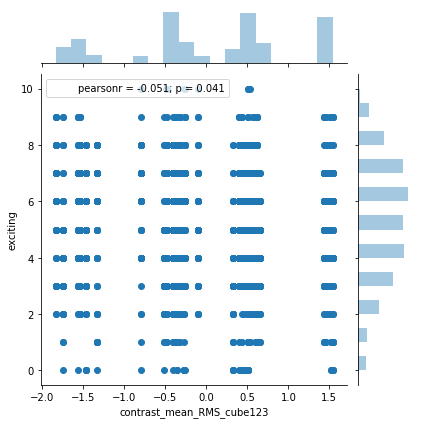

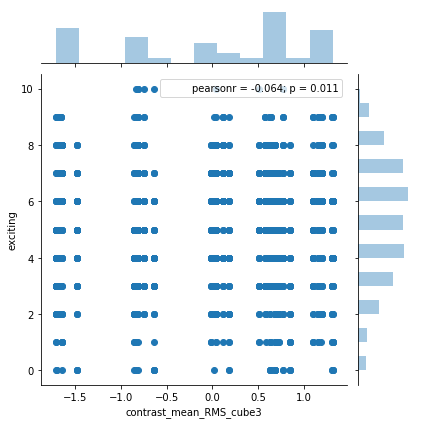

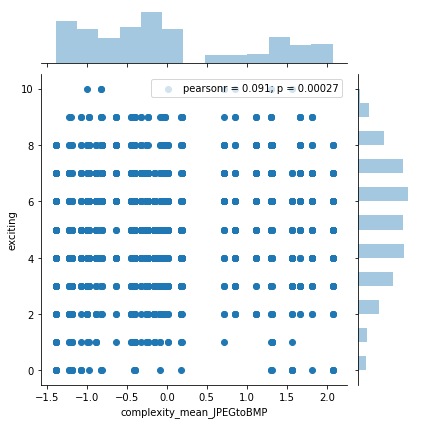

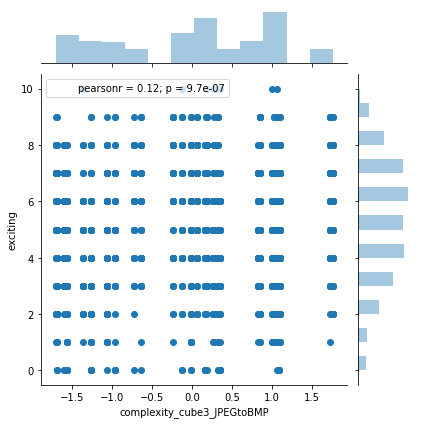

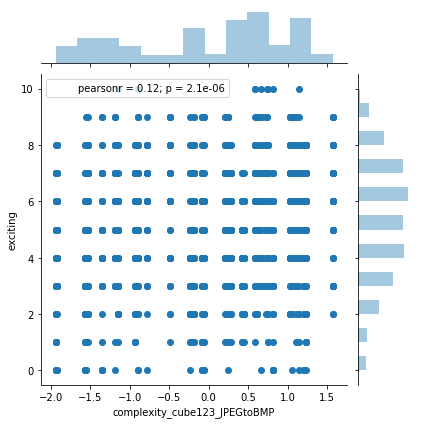

In [91]:
for feature in numeric_data.columns:
    sns.jointplot( numeric_data[feature], numeric_data['exciting'], kind ="scatter")

The scatter plot obviously fails to give a good visualization since the points are overlapping.
So we turn to density plots. 

#### hex plot

C:\Users\kiyarash\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\kiyarash\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\kiyarash\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\kiyarash\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\kiyarash\Anaconda3\lib\site-packages\matplotlib

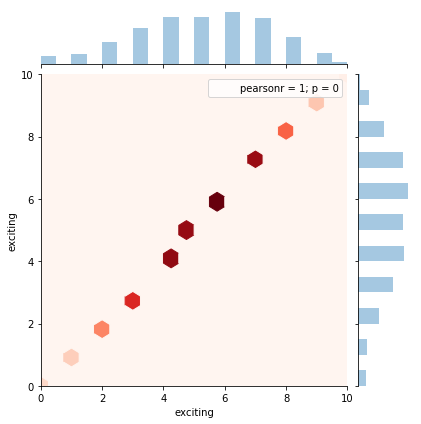

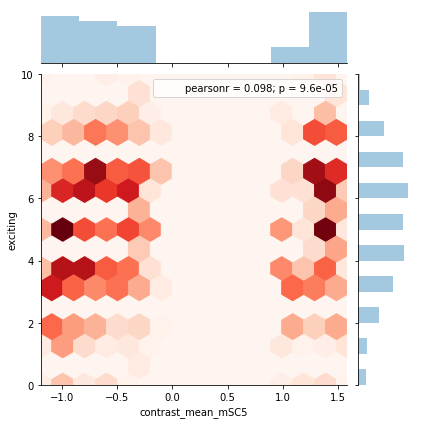

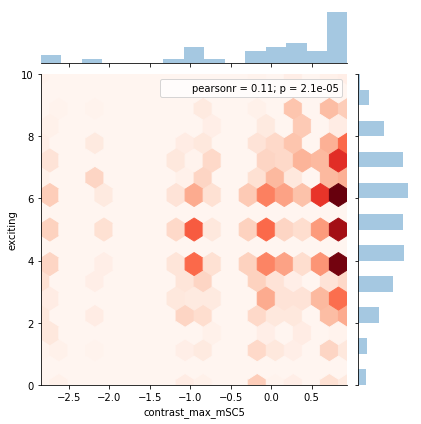

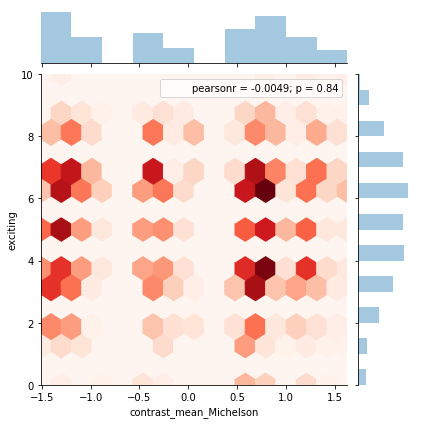

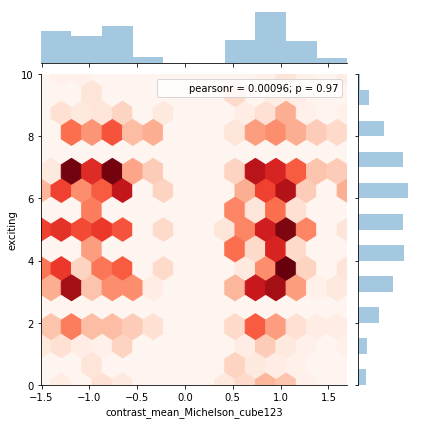

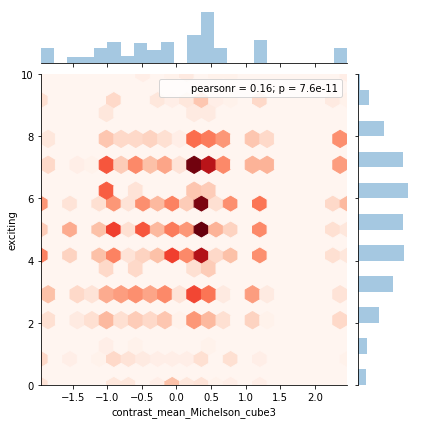

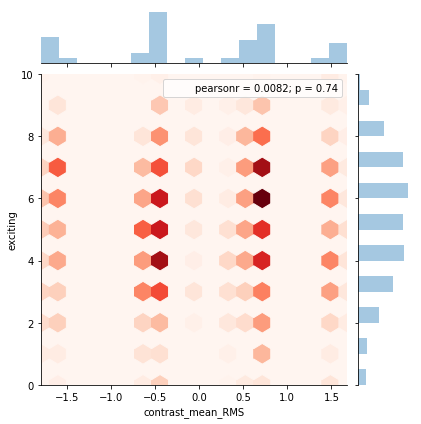

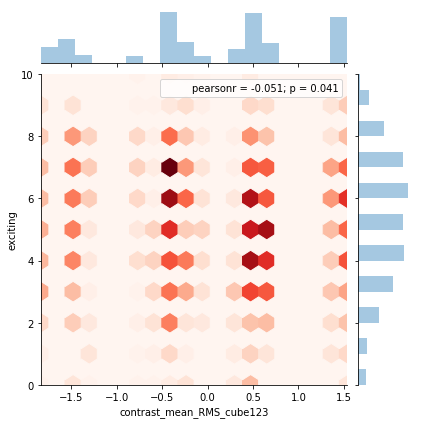

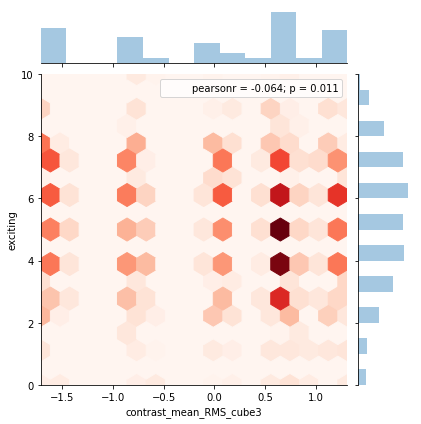

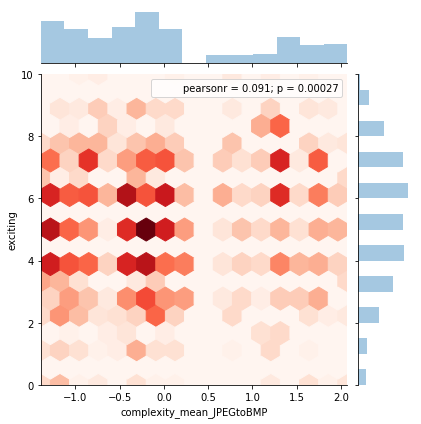

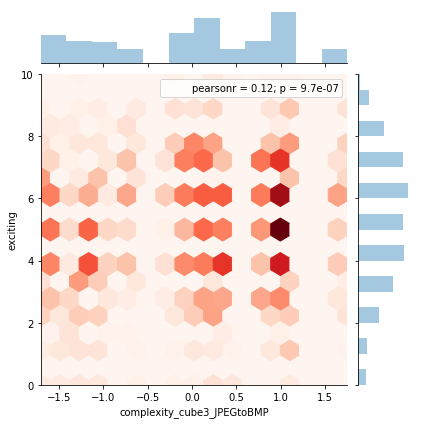

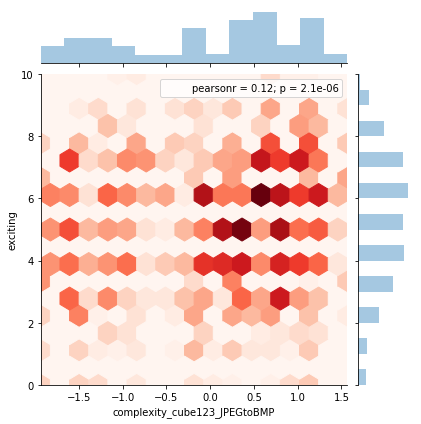

In [106]:
for feature in numeric_data.columns:
    sns.jointplot( numeric_data[feature], numeric_data['exciting'], kind = "hex", cmap="Reds")

#### kernel density plot

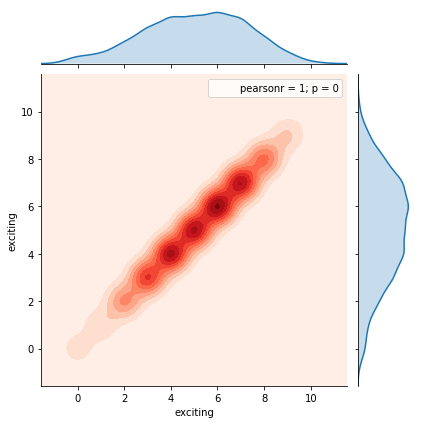

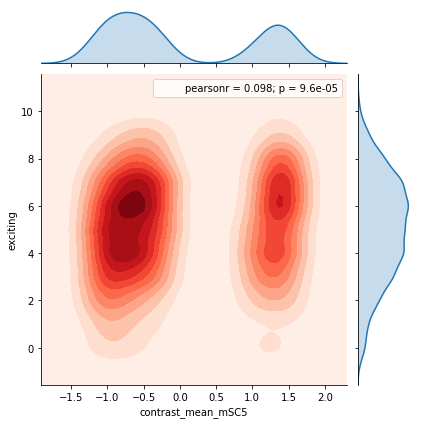

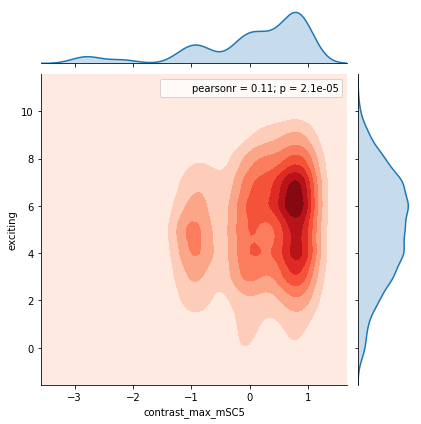

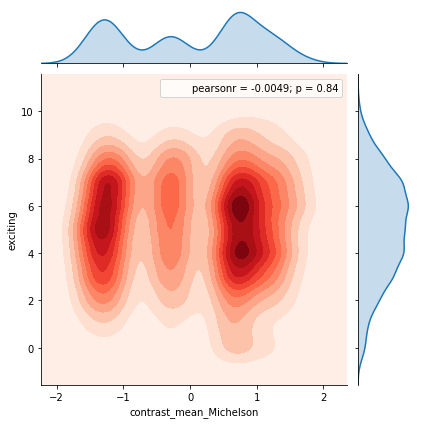

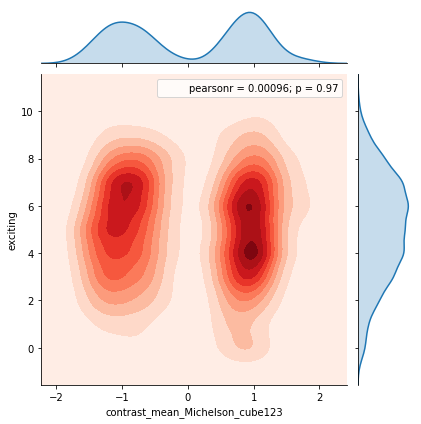

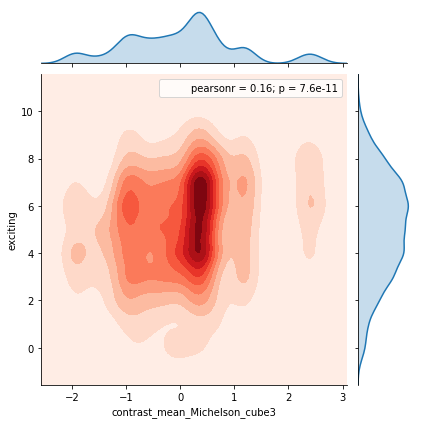

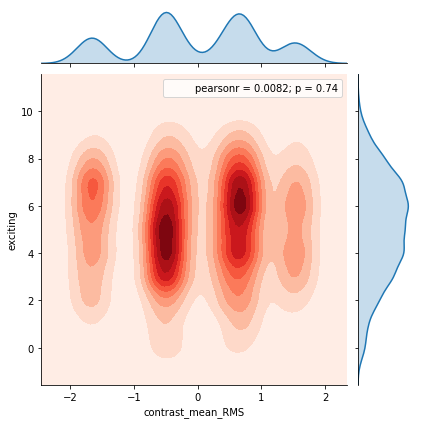

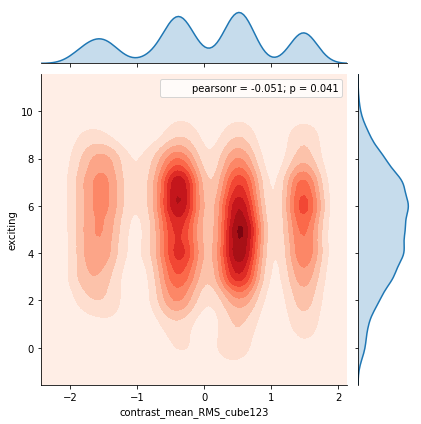

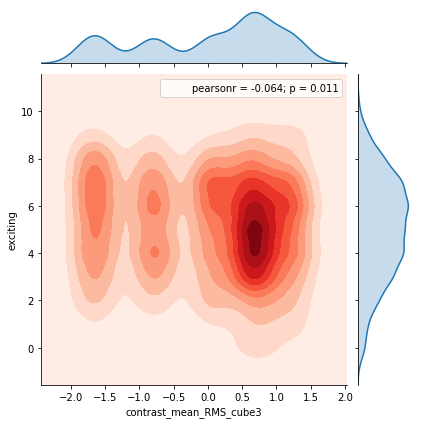

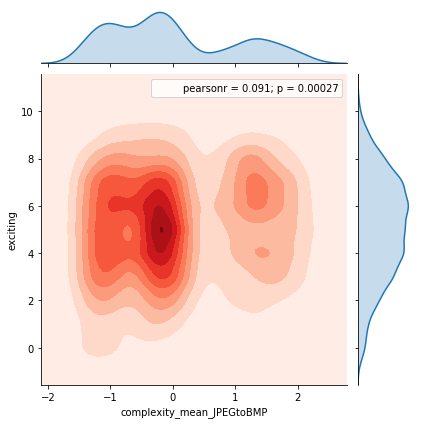

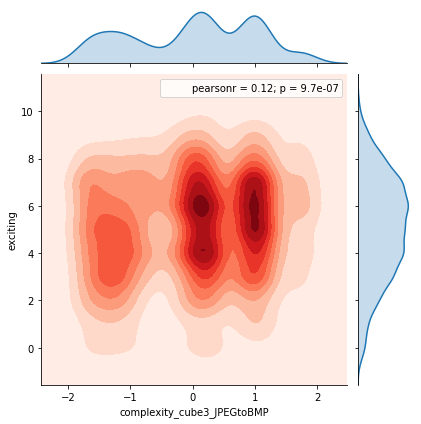

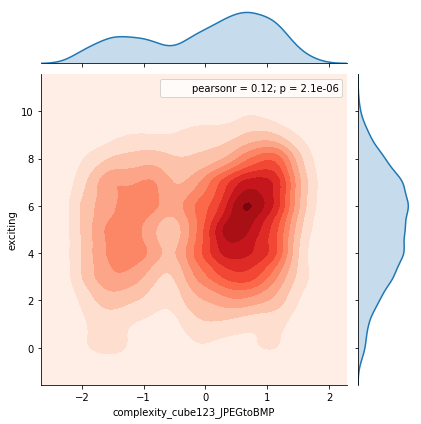

In [107]:
for feature in numeric_data.columns:
    sns.jointplot( numeric_data[feature], numeric_data.exciting, kind = "kdeplot", cmap="Reds", shade=True)

As the spread of data is mostly vertical there is still no obvious relationship bewteen the numeric 
variables and 'exciting'. 

we can also demonstrate the linear regression line estimate for each feature.

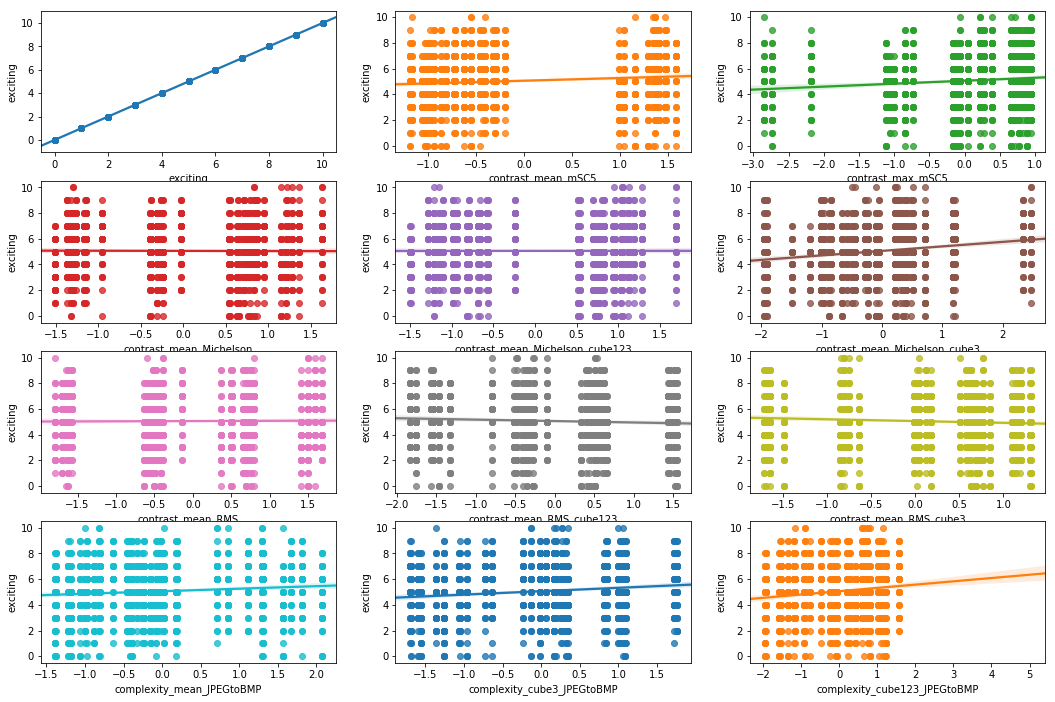

In [100]:
fig, ax = plt.subplots(round(len(numeric_data.columns) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
        sns.regplot(x=numeric_data.columns[i],y='exciting', data=numeric_data, ax=ax)

Now lets plot box plots for categorical features to see the relashionship between them and exciting

In [128]:
# we need the categorical variables in their originaL(non dummy) form
categ_data = x_fdata[categorical_features]



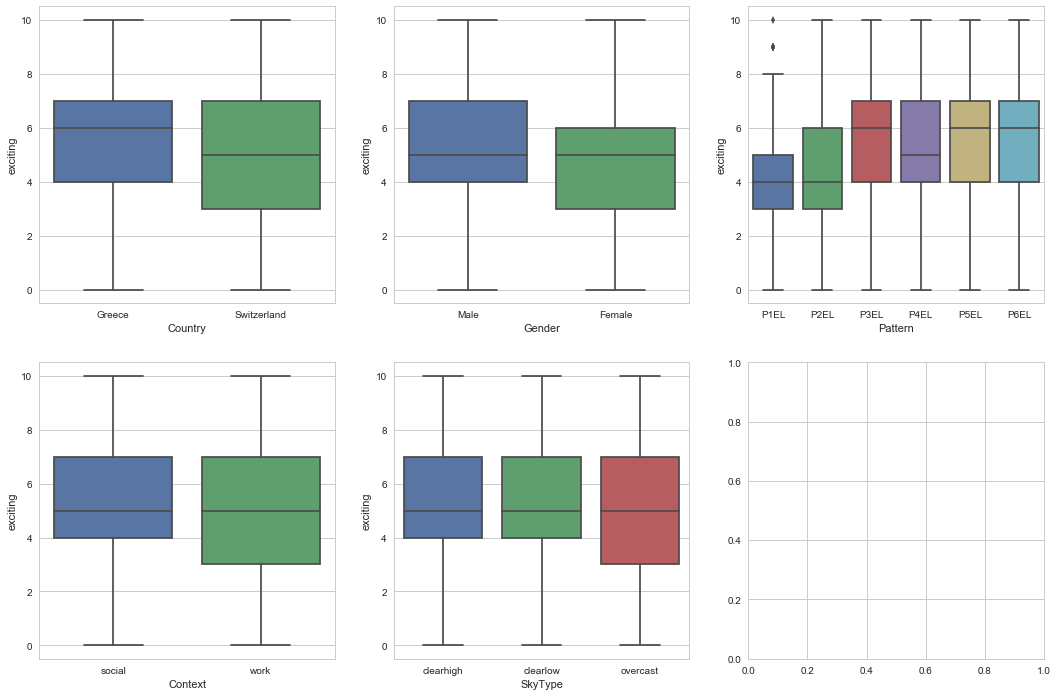

In [127]:
fig, ax = plt.subplots(round(len(categ_data.columns) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
        if (i < len(categ_data.columns)):
            sns.boxplot(x=categ_data.iloc[:,i], y=y_data, ax=ax)

we can also look at the distributions of categorical variabels

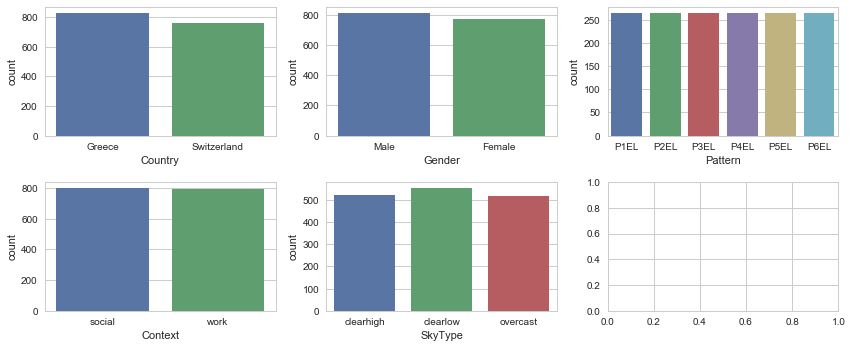

In [136]:
fig, axes = plt.subplots(round(len(categ_data.columns) / 3), 3, figsize=(12, 5))

for i, ax in enumerate(fig.axes):
    if i < len(categ_data.columns):
        sns.countplot(x=categ_data.columns[i], data=categ_data, ax=ax)

fig.tight_layout()

we see that all categories almost have a unifrom distribution. so all of them have the possibility of helping us predict the outcome.

Now lets take a look at the correlation between the **numeric** features

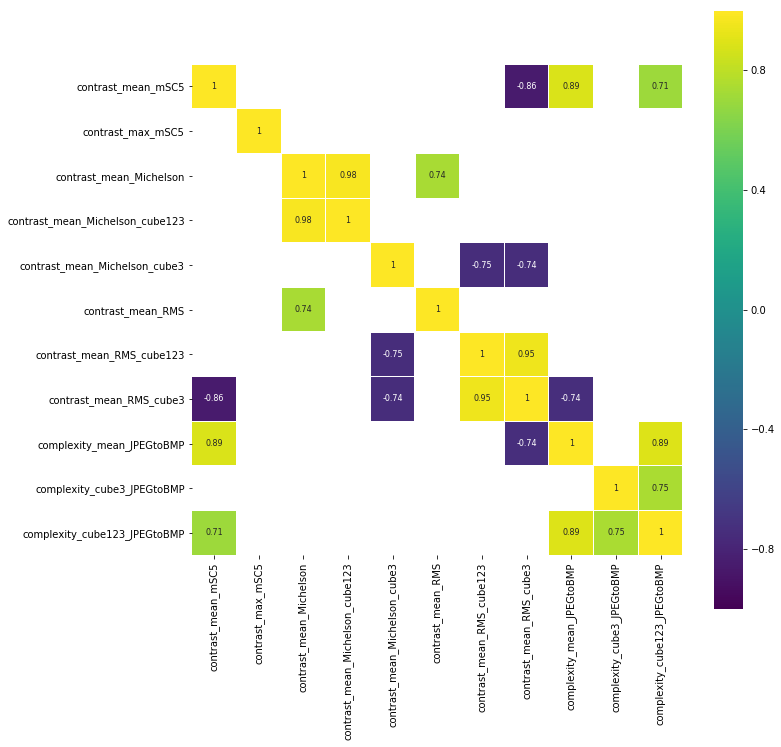

In [97]:
# remove the output variable
corr = numeric_data.drop('exciting', axis=1).corr() 

plt.figure(figsize=(11, 11))

sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

This tells us that a lot of our measures are highly correlated. 
So if one of them is not useful there might be no reason to use the other one either. 
And maybe we can also reduce our features.

#### Splitting the data

In order to split the data into the two sets (training and test), first we need to rejoin the y_data and the x_data. Then we can use the sample method (`pd.sample()`) which  randomly samples from the dataframe according to a given ratio (0.8 for train in this case). The remaining part of the data will be the test set.

In [24]:
#In order to split the data, we join then again:
data = pd.concat([y_data, x_data], axis=1, sort=False)
data.head(1)

,exciting,contrast_mean_mSC5,contrast_max_mSC5,contrast_mean_Michelson,contrast_mean_Michelson_cube123,contrast_mean_Michelson_cube3,contrast_mean_RMS,contrast_mean_RMS_cube123,contrast_mean_RMS_cube3,complexity_mean_JPEGtoBMP,...,Pattern_P2EL,Pattern_P3EL,Pattern_P4EL,Pattern_P5EL,Pattern_P6EL,Context_social,Context_work,SkyType_clearhigh,SkyType_clearlow,SkyType_overcast
0,5,-0.978351,-1.009075,-1.509758,-1.489519,-1.191899,-0.483861,0.647511,0.718682,-0.163829,...,-0.447073,-0.447073,-0.447073,-0.447073,-0.447073,0.99592,-0.99592,1.429927,-0.729011,-0.692925


In [25]:
train_df = data.sample(frac=0.8,replace=False)
test_df = data.drop(train_df.index.tolist(),axis=0)

In [26]:
train_df.head(3)

,exciting,contrast_mean_mSC5,contrast_max_mSC5,contrast_mean_Michelson,contrast_mean_Michelson_cube123,contrast_mean_Michelson_cube3,contrast_mean_RMS,contrast_mean_RMS_cube123,contrast_mean_RMS_cube3,complexity_mean_JPEGtoBMP,...,Pattern_P2EL,Pattern_P3EL,Pattern_P4EL,Pattern_P5EL,Pattern_P6EL,Context_social,Context_work,SkyType_clearhigh,SkyType_clearlow,SkyType_overcast
401,8,-0.942523,0.775111,0.534685,0.519776,-1.960305,0.692422,1.540438,1.310657,-0.392944,...,2.235365,-0.447073,-0.447073,-0.447073,-0.447073,-1.003465,1.003465,1.429927,-0.729011,-0.692925
630,8,-0.976701,-2.179946,-1.152225,-0.938750,0.351786,-1.620338,-0.381854,0.039807,-1.199089,...,-0.447073,2.235365,-0.447073,-0.447073,-0.447073,0.995920,-0.995920,-0.698897,-0.729011,1.442250
438,2,-0.942523,0.775111,0.534685,0.519776,-1.960305,0.692422,1.540438,1.310657,-0.392944,...,2.235365,-0.447073,-0.447073,-0.447073,-0.447073,-1.003465,1.003465,1.429927,-0.729011,-0.692925


In [27]:
test_df.head(3)

,exciting,contrast_mean_mSC5,contrast_max_mSC5,contrast_mean_Michelson,contrast_mean_Michelson_cube123,contrast_mean_Michelson_cube3,contrast_mean_RMS,contrast_mean_RMS_cube123,contrast_mean_RMS_cube3,complexity_mean_JPEGtoBMP,...,Pattern_P2EL,Pattern_P3EL,Pattern_P4EL,Pattern_P5EL,Pattern_P6EL,Context_social,Context_work,SkyType_clearhigh,SkyType_clearlow,SkyType_overcast
1,4,-0.978351,-1.009075,-1.509758,-1.489519,-1.191899,-0.483861,0.647511,0.718682,-0.163829,...,-0.447073,-0.447073,-0.447073,-0.447073,-0.447073,0.99592,-0.99592,1.429927,-0.729011,-0.692925
8,3,-0.978351,-1.009075,-1.509758,-1.489519,-1.191899,-0.483861,0.647511,0.718682,-0.163829,...,-0.447073,-0.447073,-0.447073,-0.447073,-0.447073,0.99592,-0.99592,1.429927,-0.729011,-0.692925
14,2,-0.978351,-1.009075,-1.509758,-1.489519,-1.191899,-0.483861,0.647511,0.718682,-0.163829,...,-0.447073,-0.447073,-0.447073,-0.447073,-0.447073,0.99592,-0.99592,1.429927,-0.729011,-0.692925


Quick check of the validity of the split by making sure that the size of the train plus the size of the test equals the size of the dummy:

In [28]:
print(train_df.shape[0] + test_df.shape[0] == dummy_df.shape[0])

True


Double check the mean of the features

In [29]:
#dummy_df.mean()

The means aren't exactly 0 but they are small enough for us to approximate them to 0.

Now for the standart deviation

In [30]:
#dummy_df.std()

Hence our standardized features and our labels are ready to go.

In [31]:
x_train = train_df.iloc[1:-1]
y_train = train_df.iloc[0:1]
x_test = train_df.iloc[1:-1]
y_test = train_df.iloc[0:1]
#x_data and y_data are the preprocessed data without splitting. Maybe we can use them considering that we have very few data

## Exploring different approachs

Having done that, we can start trying differents methods for obtaining predictions about the excitation/calm of a person who do the experiment.

## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\jorge\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(n_estimators=’warn’, criterion=’gini’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)

Firstly, we do grid search on the number of estimators "n_estimators" and the max depth of the trees "max_depth". We decide to use the accuracy as a criteria for comparing the quality of the diferents models (created by differents "n_estimators" and "max_depth"). So, we compute a data frame with the accuracy for every pair (n_estimators, max_depth) explorated.

In [33]:
n_estimators_range=range(1,100, 5)
max_depth_range= range(1,100, 5)

In [34]:
performance_results = pd.DataFrame(columns=['n_estimators', 'max_depth','accuracy'])

n=5
for i in n_estimators_range:
    for j in max_depth_range:
        forestC = RandomForestClassifier(n_estimators=i, max_depth=j)
        accuracy = cross_val_score(forestC, x_data, y_data, cv = 5, scoring='accuracy').mean()
        performance_results.loc[i*n+j-n-1] = [i, j,accuracy]  #i*n-n-1 to access to the correct index

performance_results.head()

,n_estimators,max_depth,accuracy
0,1.0,1.0,0.128967
5,1.0,6.0,0.060339
10,1.0,11.0,0.055274
15,1.0,16.0,0.044625
20,1.0,21.0,0.039025


In [35]:
performance_results.sort_values(by = "accuracy", ascending=False)

,n_estimators,max_depth,accuracy
0,1.0,1.0,0.128967
75,16.0,1.0,0.128953
50,11.0,1.0,0.119506
175,36.0,1.0,0.115985
125,26.0,1.0,0.115833
25,6.0,1.0,0.115782
400,81.0,1.0,0.107080
225,46.0,1.0,0.103935
450,91.0,1.0,0.100802
300,61.0,1.0,0.100106


In [36]:
aaaaaaaaa

NameError: name 'aaaaaaaaa' is not defined

SEE THE APPLIED ML TUTORIAL BELOW:

# Applied Machine Learning with Scikit Learn - Regressions

*Adapted from https://github.com/justmarkham*

### Libraries

- [scikit-learn](http://scikit-learn.org/stable/)
- pandas
- matplotlib

In this tutorial we will see some basic example of Linear Regression for prediction and Logistic Regression for classification.


# Prediction with Linear Regression

|     *            | continuous     | categorical    |
| ---------------- | -------------- | -------------- |
| **supervised**   | **regression** | classification |
| **unsupervised** | dim. reduction | clustering     |

### Motivation

Why are we learning linear regression?
- widely used
- runs fast
- easy to use (not a lot of tuning required)
- highly interpretable
- basis for many other methods


Let's import the dataset:

In [ ]:
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [ ]:
# print the shape of the DataFrame
data.shape

In [ ]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8), grid=True)
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1], grid=True)
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2], grid=True)

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

<img src="08_estimating_coefficients.png">

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

<img src="08_slope_intercept.png">

## Hands on!
Let's create the features and class vectors (X and y)

In [ ]:
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

X.describe()

**Scikit-learn** provides a easy way to tran the model:

In [ ]:
logistic = LinearRegression()  # create the model
logistic.fit(X, y)  # train it

Back to the theory! Let's see how the formula looks:

In [ ]:
for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(logistic.coef_[f], feature_cols[f]))
print(logistic.intercept_)



$$y = \beta_0 + \beta_1  \times TV + \beta_1  \times radio + \beta_1  \times newspaper$$
$$y = 2.938 + 0.045 \times TV + 0.18  \times radio + -0.001  \times newspaper$$

Let's plot the predictions and the original values:

In [ ]:
lr = LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=5)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

# Classification with Logistic Regression

|*|continuous|categorical|
|---|---|---|
|**supervised**|regression|**classification**|
|**unsupervised**|dim. reduction|clustering|

Let's go back to the Titanic dataset. We are interessed in predicting the 'survived' variable given the feature of the passenger. For the sake of simplicity, we consider only 4 features:

- pclass
- sex
- age
- fare

In [ ]:
titanic_raw = pd.read_excel('titanic.xls')
titanic = titanic_raw[['pclass', 'sex', 'age', 'fare', 'survived']].dropna(axis=0, how='any')
titanic.head()

In [ ]:
dead = titanic[titanic['survived']==0]
survived = titanic[titanic['survived']==1]

print("Survived {0}, Dead {1}".format(len(dead), len(survived)))

Specify the columns to use as features and the labels for the traning:

In [ ]:
titanic_features = ['pclass', 'sex', 'age', 'fare']
titanic_class = 'survived'

#### Q: How is the age distribution between the two groups?

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5));

dead_age = dead[['age']]
survived_age = survived[['age']]

dead_age.plot.hist(ax=axes[0], ylim=(0, 150), title='Dead - Age')
survived_age.plot.hist(ax=axes[1], ylim=(0, 150), title='Survived - Age')


Visible difference for young children.

### Let's prepare the feature vector for the training

The dataset contains categorical variable: sex (male|female)

We need to convert it in vector format. Pandas offers the method *get_dummies* that takes care of this expansion

In [ ]:
# The features vector
X = pd.get_dummies(titanic[titanic_features])
X.head()
# titanic['pclass'] = titanic['pclass'].astype('category')

The labels used for the traning:

In [ ]:
y = titanic['survived']

Let's create a new model...

In [ ]:
logistic = LogisticRegression(solver='lbfgs')

# for f in range(len(feature_cols)):
#     print("{0} * {1} + ".format(logistic.coef_[f], feature_cols[f]))
print(logistic)

... and evaluate the precison/recall with a cross validation (10 splits).

**Scikit-Learn** offers this convenient menthod to split the dataset and evaluate the performance.

In [ ]:
precision = cross_val_score(logistic, X, y, cv=10, scoring="precision")
recall = cross_val_score(logistic, X, y, cv=10, scoring="recall")

# Precision: avoid false positives
print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
# Recall: avoid false negatives
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))

### Explore the model output

Let's train on the full dataset

In [ ]:
logistic = LogisticRegression(solver='lbfgs')
logistic.fit(X, y)

Given one sample, logistic regression generates the probability of belonging to the positive class. With **Scikit-Learn** we can access to this value thanks to the method *predict_proba*

In [ ]:
pred = logistic.predict_proba(X)
pred

Of course, since we trained the whole dataset, we don't have new samples to predict, but we can predict the outcome and the relative probability for some artificial samples. Would you survive?

In [ ]:
X.columns

In [ ]:
logistic.predict([[3, 25, 200, 0, 1]])

In [ ]:
logistic.predict_proba([[3, 25, 200, 0, 1]])

In [ ]:
logistic.predict([[3, 25, 200, 1, 0]])

In [ ]:
logistic.predict_proba([[3, 25, 200, 1, 0]])